<a href="https://colab.research.google.com/github/exponentialR/Notebooks/blob/main/collecting_landmarks_with_mediapipe_hands.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install mediapipe


In [174]:
from google.colab import files

uploaded = files.upload()

Saving WhatsApp Image 2021-10-28 at 4.29.33 PM.jpeg to WhatsApp Image 2021-10-28 at 4.29.33 PM (3).jpeg


WhatsApp Image 2021-10-28 at 4.29.33 PM.jpeg


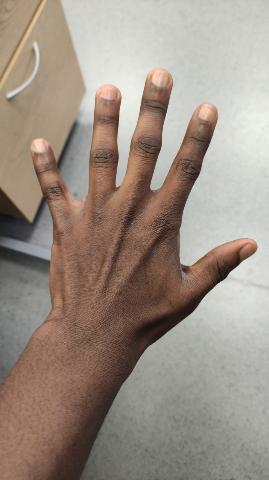

In [175]:
import cv2
from google.colab.patches import cv2_imshow
import math
import numpy as np

DESIRED_HEIGHT = 480
DESIRED_WIDTH = 480
def resize_and_show(image):
  h, w = image.shape[:2]
  if h < w:
    img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
  else:
    img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
  cv2_imshow(img)

# Read images with OpenCV.
images = {name: cv2.imread(name) for name in uploaded.keys()}
# Preview the images.
for name, image in images.items():
  print(name)   
  resize_and_show(image)

In [176]:
import mediapipe as mp
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

Handedness of WhatsApp Image 2021-10-28 at 4.29.33 PM.jpeg:
[classification {
  index: 0
  score: 0.9718399047851562
  label: "Left"
}
]
Hand landmarks of WhatsApp Image 2021-10-28 at 4.29.33 PM.jpeg:
Index finger tip coordinate: ( 201.46822527050972, 371.8309540450573)


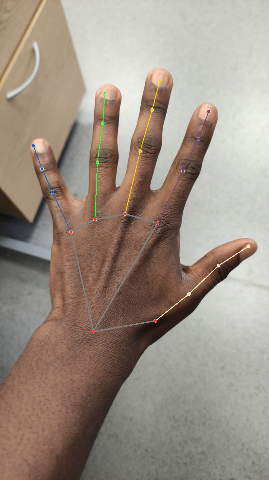

In [178]:
with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=1,
    min_detection_confidence=0.4) as hands:
  for name, image in images.items():
    # Convert the BGR image to RGB, flip the image around y-axis for correct 
    # handedness output and process it with MediaPipe Hands.
    results = hands.process(cv2.flip(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 1))

    # Print handedness (left v.s. right hand).
    print(f'Handedness of {name}:')
    print(results.multi_handedness)

    if not results.multi_hand_landmarks:
      continue
    # Draw hand landmarks of each hand.
    print(f'Hand landmarks of {name}:')
    image_hight, image_width, _ = image.shape
    annotated_image = cv2.flip(image.copy(), 1)
    for hand_landmarks in results.multi_hand_landmarks:
      # Print index finger tip coordinates.
      print(
          f'Index finger tip coordinate: (',
          f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width}, '
          f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_hight})'
      )
      mp_drawing.draw_landmarks(
          annotated_image,
          hand_landmarks,
          mp_hands.HAND_CONNECTIONS,
          mp_drawing_styles.get_default_hand_landmarks_style(),
          mp_drawing_styles.get_default_hand_connections_style())
    resize_and_show(cv2.flip(annotated_image, 1))

In [186]:
for id, handlms in enumerate(results.multi_hand_landmarks):
  for _, classification1 in enumerate(results.multi_handedness):
    right_hand = np.array([[landmarked.x, landmarked.y, landmarked.z] for landmarked in handlms.landmark]).flatten() if classification1.classification[0].index == 1 else np.zeros(21 * 3)
    left_hand2 = np.array([[ coordinates.y] for coordinates in handlms.landmark]).flatten() if classification1.classification[0].index == id else np.zeros(21 * 3)
    gm = np.concatenate([right_hand, left_hand2])

In [187]:
print(gm)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.69058561 0.66818327 0.61255074
 0.5539735  0.51331985 0.4647423  0.35545966 0.28916854 0.23253968
 0.44531697 0.31460601 0.22931018 0.16728503 0.45767832 0.33817622
 0.25686103 0.19357726 0.48368171 0.39979264 0.35173011 0.30388051]


In [ ]:
print(len(y))

126
